In [11]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
model_names = ["gpt2", "bart", "roberta"]

def loadJson(filename):
    f = open(filename)
    data = json.load(f)
    f.close()
    return data

def getDataframe(benchmark):
    sparsity = [0, 10, 50, 90, 95, 99]
    model_runtime = [sparsity]
    model_loss = [sparsity]
    for model_name in model_names:
        cur_runtime = []
        cur_loss = []
        for spar in sparsity:
            filename = f'output/{benchmark}-{model_name}_{spar}.json'
            data = loadJson(filename)
            cur_runtime.append(data['train_runtime'])
            cur_loss.append(data['train_loss'])
        model_runtime.append(cur_runtime)
        model_loss.append(cur_loss)
    
    df_runtime = pd.DataFrame(np.transpose(model_runtime), columns=["sparsity", "gpt2", "bart", "roberta"])
    df_loss = pd.DataFrame(np.transpose(model_loss), columns=["sparsity", "gpt2", "bart", "roberta"])
    
    return (df_runtime, df_loss)


def plot_performance(benchmark, save=True):
    df_runtime, df_loss = getDataframe(benchmark=benchmark)

    if benchmark == 'clm':
        loss_title = "Train loss on Casual Language Modeling on Wikitext"
        runtime_title = "Runtime on Casual Language Modeling on Wikitext"
    elif benchmark == 'glue':
        loss_title = "Train loss on GLUE MRPC Sentence Classification"
        runtime_title = "Runtime on GLUE MRPC Sentence Classification"

    for model_name in model_names:
        df_loss.plot(
            x = 'sparsity', 
            y = model_name, 
            xlabel="Sparsity (%)", 
            ylabel="Loss", 
            title=f"{model_name}: {loss_title}"
        )
        if save:
            plt.savefig(f"plots/{benchmark}-{model_name}_loss.png", dpi=199)
        plt.show()
        
        df_runtime.plot(
            x = 'sparsity', 
            y = model_name, 
            xlabel="Sparsity (%)", 
            ylabel="Runtime (sec)", 
            title=f"{model_name}: {runtime_title}"
        )
        if save:
            plt.savefig(f"plots/{benchmark}-{model_name}_runtime.png", dpi=199)
        plt.show()
    

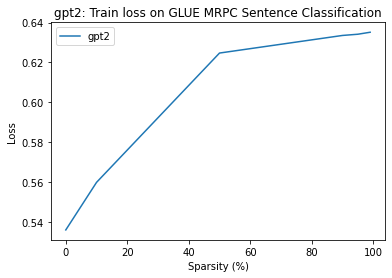

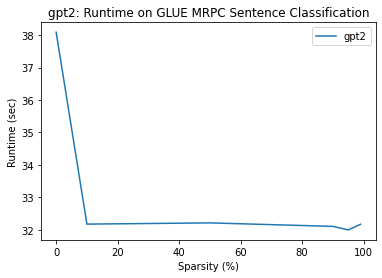

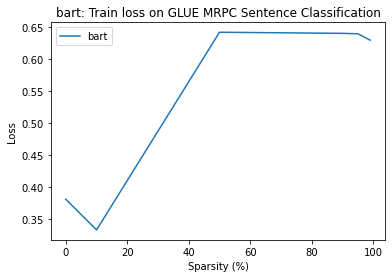

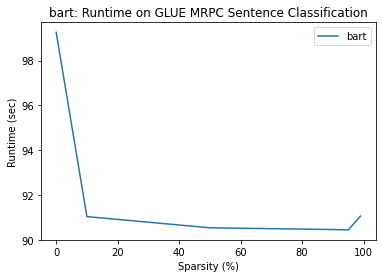

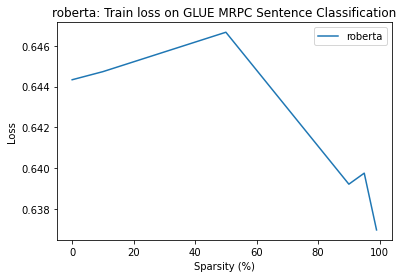

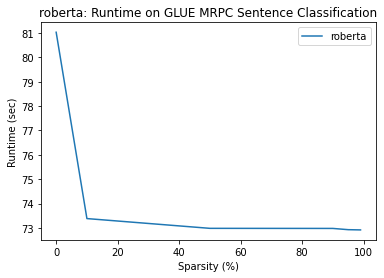

In [30]:
plot_performance(benchmark='glue')

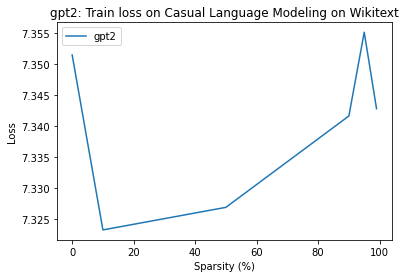

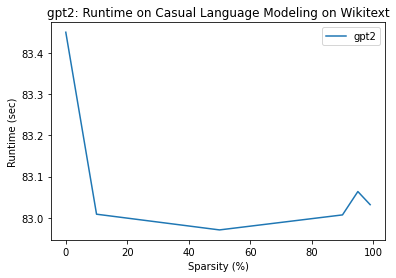

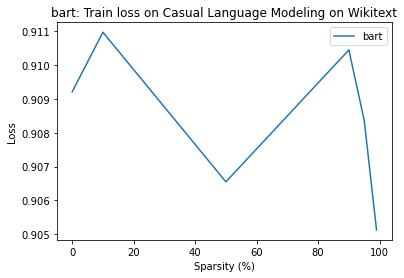

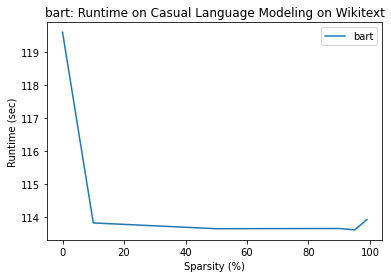

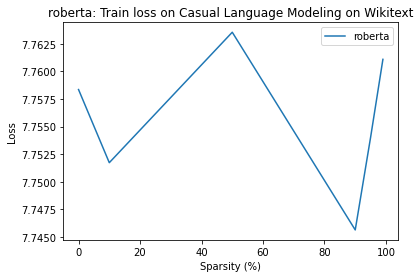

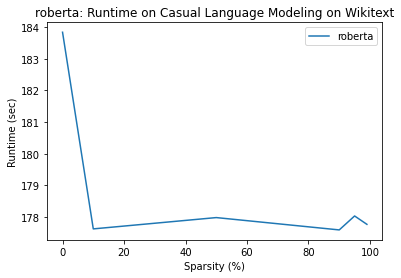

In [31]:
plot_performance(benchmark='clm')

In [35]:
df_size = pd.read_csv('output/model_sizes.csv')

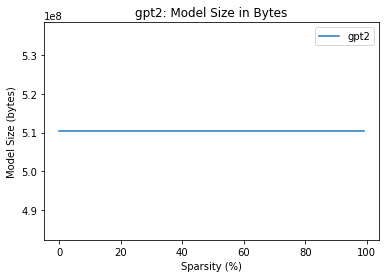

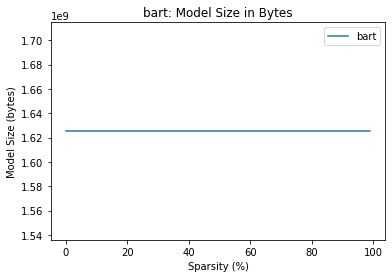

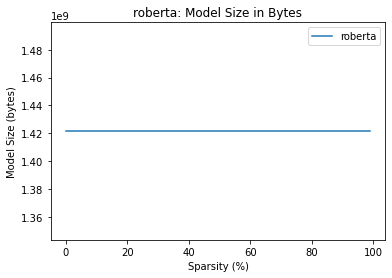

In [38]:
for model_name in model_names:
    df_size.plot(
        x = 'sparsity', 
        y = model_name, 
        xlabel="Sparsity (%)", 
        ylabel="Model Size (bytes)", 
        title=f"{model_name}: Model Size in Bytes"
    )
    plt.savefig(f"plots/{model_name}_size.png", dpi=199)
    plt.show()